# Cross-Entropy

## RL Methods

- model-free or model-based
- value-based or policy-based
- on-policy or off-policy

**model-free** methods just tries to directly connect observations to actions. Will not look into future actions.

**model-based** methods try to predict what the next observation/reward will be. May attempt to look at future actions/rewards and pick the best one. Tend to be used in board-games with fixed rules

**value-based** methods let the agent calculate the value of every possible action and choose the action with the best value.

**off-policy** methods learn from historical data played by human games

Cross-entropy is model-free, policy-based, and on-policy which means

- It doesn't build any model of the environment, it just says what the next step should be for the agent
- approximates the policy of the agent
- requires fresh data obtained from the environment

## Cross-entropy method in practice

Two parts: practical and theoretical. practical is intuitive and theoretical explains why it works and is more sophisticated.

Agent is a nonlinear network which learns the mapping from observation to policy

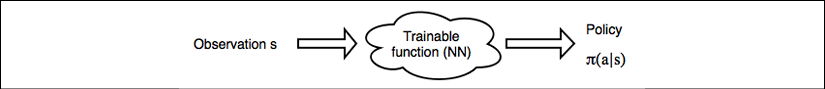

The **policy** is usually represented as a probability distribution over actions making it very similar to a classification problem, with the amount of classes being equal to the amount of actions we carry out.

Agent steps:

1. pass an observation from the environment to the agent (NN)
2. get a probability distribution over actions
3. perform random sampling using probability distribution to get an action to carry out

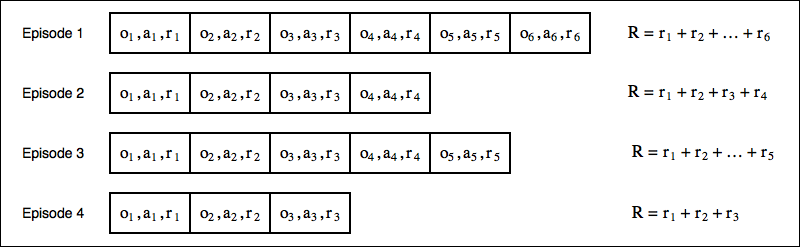

An episode is a single game and every cell is the agent's step in the episode. Agent selects random actions and causes some episodes to be better than others. Cross-entropy method will throw away bad episodes and train on better ones.

### Training method

1. Play N number of episodes using our current model and environment
2. Calculate the total reward for every episode and decide on a reward boundary. Usually, use some percentile of all rewards, such as 50th or 70th
3. Throw away all episodes with a reward below the boundary
4. Train on the remaining "elite" episodes using observations as the input and issued actions as the desired output
5. repeat step 1 until we become satisfied with the result.

Summary: NN learns how to repeat actions which lead to higher rewards moving the reward boundary higher and higher.

In [2]:
import torch
from torch import nn

HIDDEN_SIZE = 128
BATCH_SIZE = 16
PERCENTILE = 70

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device = {device}')

class Net(nn.Module):
    """2-layer neural network. Takes observations and outputs probability for every action
    """
    def __init__(self, obs_size, hidden_size, n_actions):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_actions)
        )
        
    def forward(self, x):
        return self.net(x)

    
"""Two helper classes"""

# Single episode stored as total undiscounted reward and collection of an episode step
Episode = namedtuple('Episode', field_names=['reward', 'steps'])

# Represent one single step that our agent made in the episode and store observation 
#from the enviornment and what action the agent completed
EpisodeStep = namedtuple(
    'EpisodeStep',field_names=['observation', 'action'])

def iterate_batches(env, net, batch_size):
    """Accepts the environment, NN, count of episodes it should generate on every iteration
    """
    batch = [] # used to accummulate our batch (list of episodes)
    episode_reward = 0.0 # reward counter
    episode_steps = [] # accummulate episode steps
    obs = env.reset() # reset env
    sm = nn.Softmax(dim=1) # convert NN output to a probability distribution of actions
    
    # ENVIRONMENT LOOP
    while True:
        obs_v = torch.FloatTensor([obs])
        act_probs_v = sm(net(obs_v))
        act_probs = act_probs_v.data.numpy()[0]
        

using device = cuda
